## DEVELOP A MACHINE LEARNING MODEL TO DETECT POTENTIALLY FRAUDULENT TRANSACTIONS BASED ON PROVIDED FEATURES

#### Fraudulent transaction is the one of the most serious threats to online security nowadays. Artificial Intelligence is vital for financial risk control in cloud environment.

#### Fraudulent transactions fuel the criminal misuse of identity details and pose a serious threat to national security. This issue is heightened by the growing sophistication of business transactions using payment cards, causing its policing to be increasingly difficult. Both public and private sector organizations are required by law to comply with industry standards for information technology security and these standards normally mandate the creation of security policies and audit trails for these enterprises, especially from key systems holding sensitive information

####  The dataset contains information about various transactions, including account age, payment method, time of transaction, and category. The goal is to build a classification model that can accurately classify transactions as either legitimate or potentially fraudulent.

######   <img src="Fraud.jpg" width="500" height="340">      <img src="fraud2.png" width="500" height="340"> 

# IMPORT LIBRARY

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

# IMPORT DATASET

In [3]:
df = pd.read_csv("payment_fraud_data.csv")
df.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,isWeekend,Category,label
0,29,1,4.745402,paypal,28,0.0,electronics,0
1,725,1,4.742303,storecredit,0,1.0,shopping,0
2,845,1,4.921318,creditcard,0,0.0,shopping,0
3,503,1,4.886641,creditcard,0,1.0,shopping,0
4,2000,1,5.040929,creditcard,0,1.0,shopping,0


In [4]:
df.shape

(39221, 8)

In [5]:
df.describe()

,accountAgeDays,numItems,paymentMethodAgeDays,isWeekend,label
count,39221.000000,39221.000000,39221.000000,38661.000000,39221.000000
mean,857.563984,1.084751,122.642309,0.498099,0.014278
std,804.788212,0.566899,283.575497,0.500003,0.118636
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,72.000000,1.000000,0.000000,0.000000,0.000000
50%,603.000000,1.000000,0.000000,0.000000,0.000000
75%,1804.000000,1.000000,88.000000,1.000000,0.000000
max,2000.000000,29.000000,2000.000000,1.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        39221 non-null  int64  
 1   numItems              39221 non-null  int64  
 2   localTime             39221 non-null  object 
 3   paymentMethod         39221 non-null  object 
 4   paymentMethodAgeDays  39221 non-null  int64  
 5   isWeekend             38661 non-null  float64
 6   Category              38574 non-null  object 
 7   label                 39221 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 2.4+ MB


##### ----- To find unique values  --------

In [7]:
for i in df.columns:
    print("*******************",i,"*****************")
    print()
    print(set(df[i].to_list()))
    print()

******************* accountAgeDays *****************

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211

###### ----------------- REPLACING WRONGLY ENTERED VALUES -------------

In [8]:
df["Category"] = df["Category"].replace("food$$","food")
df["Category"] = df["Category"].replace("food$","food")
df["localTime"] = df["localTime"].replace("4.745402$","4.745402")
df["localTime"] = df["localTime"].replace("4.876-771","4.876771")                                          

In [9]:
df['localTime'] = pd.to_numeric(df['localTime'])

In [10]:
for i in df.columns:
    print("*******************",i,"*****************")
    print()
    print(set(df[i].to_list()))
    print()

******************* accountAgeDays *****************

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211

In [11]:
df.shape

(39221, 8)

###### --- CHECKING DUPLICATE VALUES AND DROPING DUPLICATES  ------

In [12]:
df.duplicated().sum()

5996

In [13]:
df1 = df.drop_duplicates()

In [14]:
df1.shape

(33225, 8)

In [15]:
df1.duplicated().sum()

0

In [16]:
df1.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,isWeekend,Category,label
0,29,1,4.745402,paypal,28,0.0,electronics,0
1,725,1,4.742303,storecredit,0,1.0,shopping,0
2,845,1,4.921318,creditcard,0,0.0,shopping,0
3,503,1,4.886641,creditcard,0,1.0,shopping,0
4,2000,1,5.040929,creditcard,0,1.0,shopping,0


# DATA PREPROCESSING
## 1. MISSING VALUE TREATMENT `

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33225 entries, 0 to 39220
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        33225 non-null  int64  
 1   numItems              33225 non-null  int64  
 2   localTime             33225 non-null  float64
 3   paymentMethod         33225 non-null  object 
 4   paymentMethodAgeDays  33225 non-null  int64  
 5   isWeekend             32690 non-null  float64
 6   Category              32603 non-null  object 
 7   label                 33225 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 2.3+ MB


In [18]:
df1.isnull().sum()

accountAgeDays            0
numItems                  0
localTime                 0
paymentMethod             0
paymentMethodAgeDays      0
isWeekend               535
Category                622
label                     0
dtype: int64

In [19]:
df1.isnull().sum() / len(df) * 100

accountAgeDays          0.000000
numItems                0.000000
localTime               0.000000
paymentMethod           0.000000
paymentMethodAgeDays    0.000000
isWeekend               1.364065
Category                1.585885
label                   0.000000
dtype: float64

###### -----------IMPUTING MISSING VALUES (NUMERICAL - MEAN) ----------------

In [20]:
df1["isWeekend"] = df1["isWeekend"].fillna(df1["isWeekend"].mean())

###### -------------IMPUTING MISSING VALUES ( CATEGORICAL - MODE ) ----------------

In [21]:
df1["Category"].mode()

0    shopping
Name: Category, dtype: object

In [22]:
df1["Category"] = df1["Category"].fillna("shopping")

In [23]:
df1.isnull().sum()

accountAgeDays          0
numItems                0
localTime               0
paymentMethod           0
paymentMethodAgeDays    0
isWeekend               0
Category                0
label                   0
dtype: int64

## 2. ENCODING PART

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33225 entries, 0 to 39220
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        33225 non-null  int64  
 1   numItems              33225 non-null  int64  
 2   localTime             33225 non-null  float64
 3   paymentMethod         33225 non-null  object 
 4   paymentMethodAgeDays  33225 non-null  int64  
 5   isWeekend             33225 non-null  float64
 6   Category              33225 non-null  object 
 7   label                 33225 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 2.3+ MB


In [25]:
df1["paymentMethod"].value_counts()

creditcard     23138
paypal          8263
storecredit     1824
Name: paymentMethod, dtype: int64

In [26]:
df1["Category"].value_counts()

shopping       11801
electronics    10728
food           10696
Name: Category, dtype: int64

###### ---- ONE HOT ENCODER -----

In [27]:
 df1 = pd.get_dummies(df1 , columns=["paymentMethod", "Category"])

In [28]:
df1.head()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,isWeekend,label,paymentMethod_creditcard,paymentMethod_paypal,paymentMethod_storecredit,Category_electronics,Category_food,Category_shopping
0,29,1,4.745402,28,0.0,0,0,1,0,1,0,0
1,725,1,4.742303,0,1.0,0,0,0,1,0,0,1
2,845,1,4.921318,0,0.0,0,1,0,0,0,0,1
3,503,1,4.886641,0,1.0,0,1,0,0,0,0,1
4,2000,1,5.040929,0,1.0,0,1,0,0,0,0,1


###### ----- REMOVING DUMMY VARIABLE(N-1) ----------

In [29]:
df1 = df1.drop(["paymentMethod_creditcard","Category_electronics"], axis=1)

In [30]:
df1.head()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,isWeekend,label,paymentMethod_paypal,paymentMethod_storecredit,Category_food,Category_shopping
0,29,1,4.745402,28,0.0,0,1,0,0,0
1,725,1,4.742303,0,1.0,0,0,1,0,1
2,845,1,4.921318,0,0.0,0,0,0,0,1
3,503,1,4.886641,0,1.0,0,0,0,0,1
4,2000,1,5.040929,0,1.0,0,0,0,0,1


In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33225 entries, 0 to 39220
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   accountAgeDays             33225 non-null  int64  
 1   numItems                   33225 non-null  int64  
 2   localTime                  33225 non-null  float64
 3   paymentMethodAgeDays       33225 non-null  int64  
 4   isWeekend                  33225 non-null  float64
 5   label                      33225 non-null  int64  
 6   paymentMethod_paypal       33225 non-null  uint8  
 7   paymentMethod_storecredit  33225 non-null  uint8  
 8   Category_food              33225 non-null  uint8  
 9   Category_shopping          33225 non-null  uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 1.9 MB


## 3. HANDLING OUTLIER

In [32]:
df1.describe()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,isWeekend,label,paymentMethod_paypal,paymentMethod_storecredit,Category_food,Category_shopping
count,33225.000000,33225.000000,33225.000000,33225.000000,33225.000000,33225.000000,33225.000000,33225.000000,33225.000000,33225.000000
mean,790.303687,1.097878,4.740789,142.299082,0.497614,0.009270,0.248698,0.054898,0.321926,0.355184
std,755.909880,0.607504,0.400825,300.847734,0.495960,0.095836,0.432265,0.227785,0.467222,0.478576
min,1.000000,1.000000,0.421214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,84.000000,1.000000,4.742303,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,540.000000,1.000000,4.886641,1.000000,0.497614,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1555.000000,1.000000,4.962055,128.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,2000.000000,29.000000,5.040929,2000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


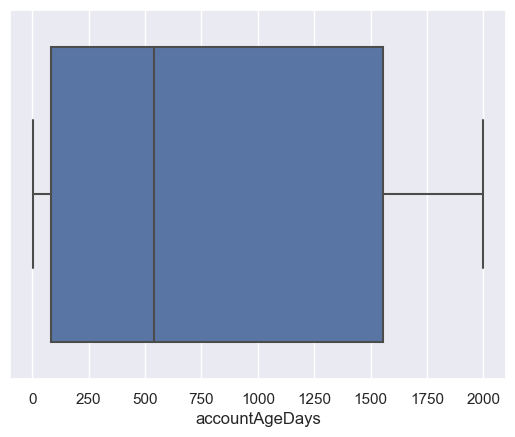

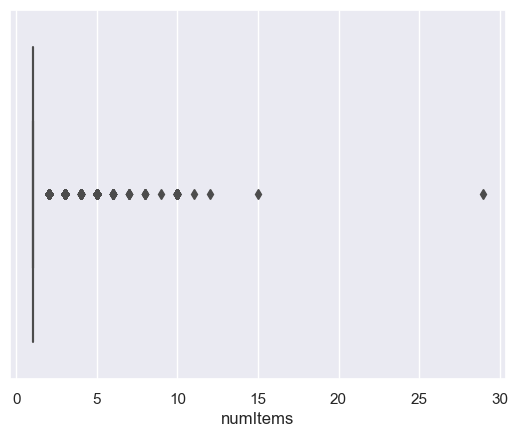

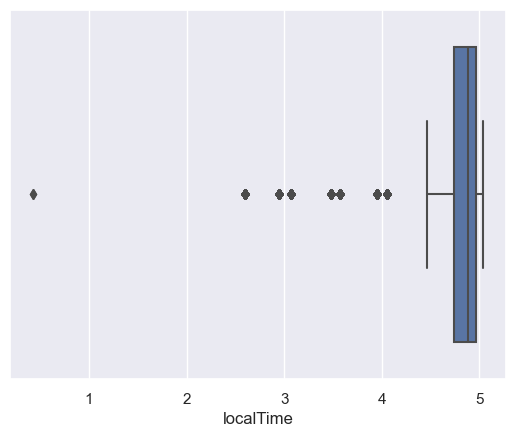

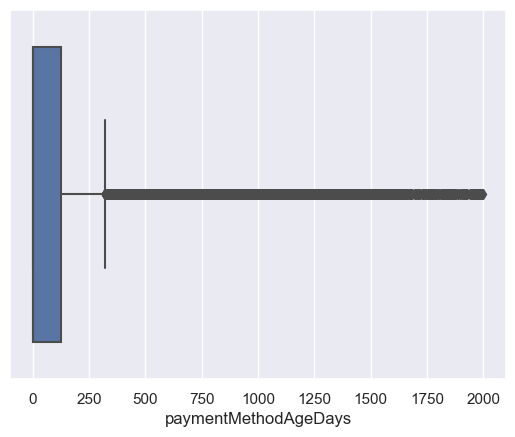

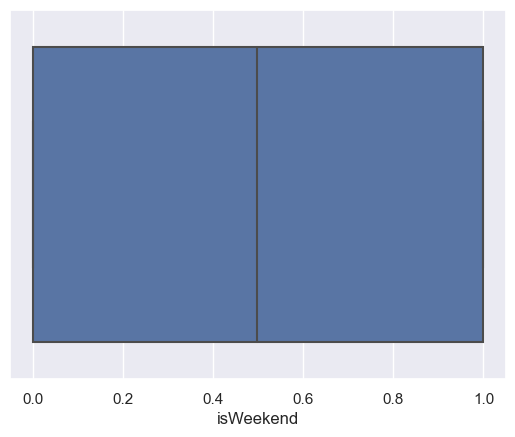

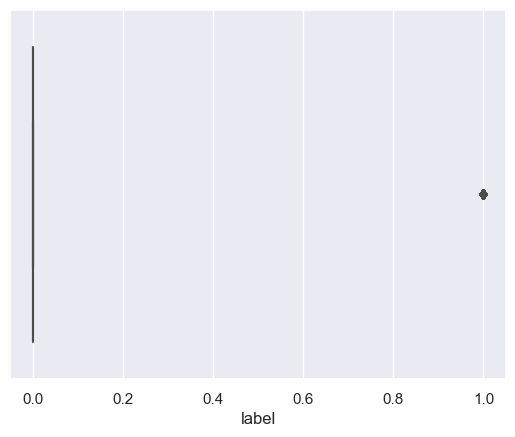

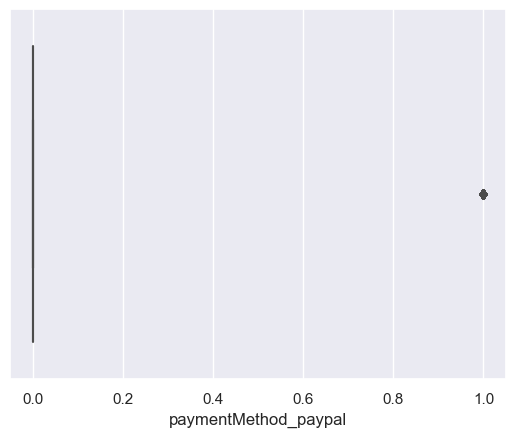

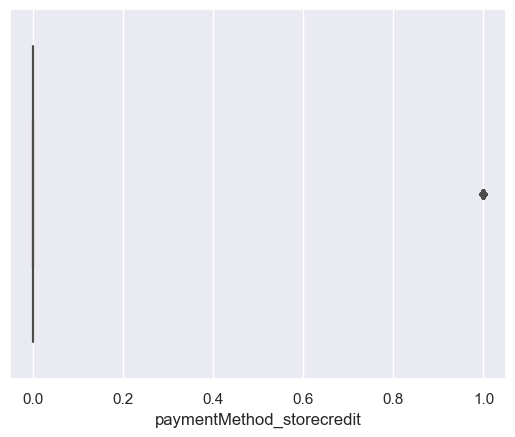

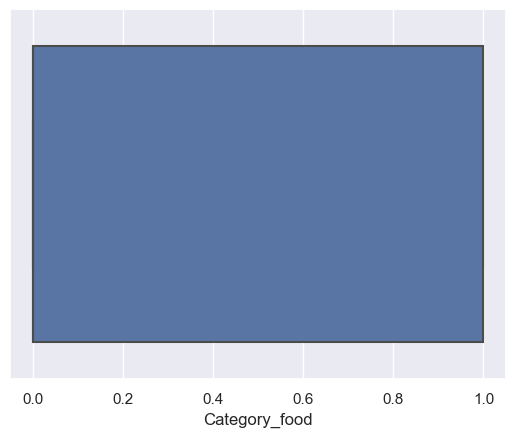

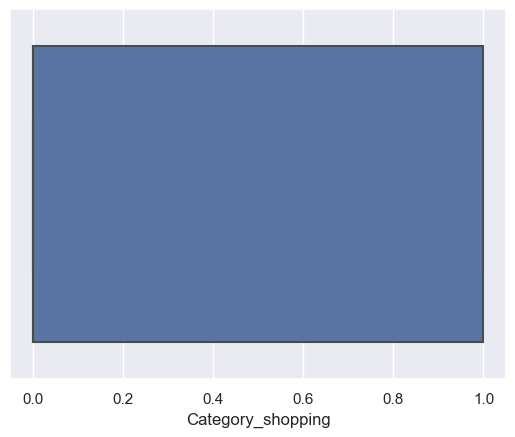

In [33]:
def boxplots(col):
    sns.boxplot(df1[col])
    plt.show()
for i in list(df1.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

###### -------------- Handling outlier is not required in this case -------------

## 4. FEATURE SCALING

### SPLIT DATA  INTO  INDEPENDENT VARIABLE (X)  AND DEPENDENT VARIABLE (Y)

In [34]:
x = df1.drop(["label"] , axis=1)
y = df1[["label"]]

In [35]:
y.head()

,label
0,0
1,0
2,0
3,0
4,0


###### -------- APPLYING FEATURE SCALING - STANDARD SCALER ---------

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_x = sc.fit_transform(x)
sc_x = pd.DataFrame(sc_x)
sc_x.columns = x.columns
sc_x.head()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,isWeekend,paymentMethod_paypal,paymentMethod_storecredit,Category_food,Category_shopping
0,-1.007151,-0.161117,0.011509,-0.379929,-1.003350,1.738084,-0.241013,-0.689033,-0.742180
1,-0.086392,-0.161117,0.003777,-0.473001,1.012972,-0.575346,4.149152,-0.689033,1.347382
2,0.072359,-0.161117,0.450400,-0.473001,-1.003350,-0.575346,-0.241013,-0.689033,1.347382
3,-0.380082,-0.161117,0.363884,-0.473001,1.012972,-0.575346,-0.241013,-0.689033,1.347382
4,1.600342,-0.161117,0.748816,-0.473001,1.012972,-0.575346,-0.241013,-0.689033,1.347382


## 5. IMBALANCE TREATMENT

In [37]:
y.value_counts()                                            # IMBALANCE DATA

label
0        32917
1          308
dtype: int64

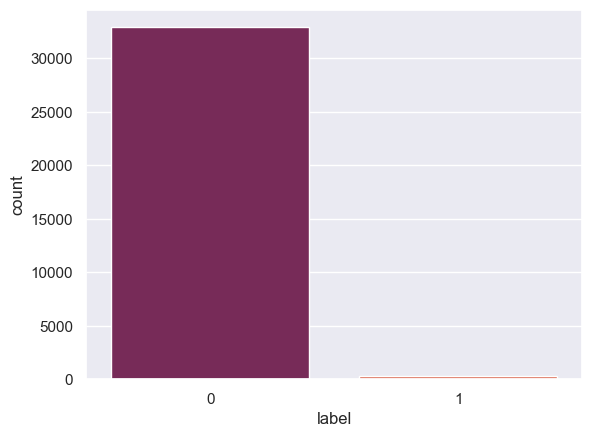

In [94]:
sns.countplot(data = df1 , x="label" ,palette="rocket")
plt.show()

##### USING OVERSAMPLING METHOD - BALANCING THE DATASET

In [39]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()

In [40]:
x_ros , y_ros = ros.fit_resample(sc_x , y)
y_ros.value_counts()

label
0        32917
1        32917
dtype: int64

In [41]:
print(y_ros.shape)
print(x_ros.shape)

(65834, 1)
(65834, 9)


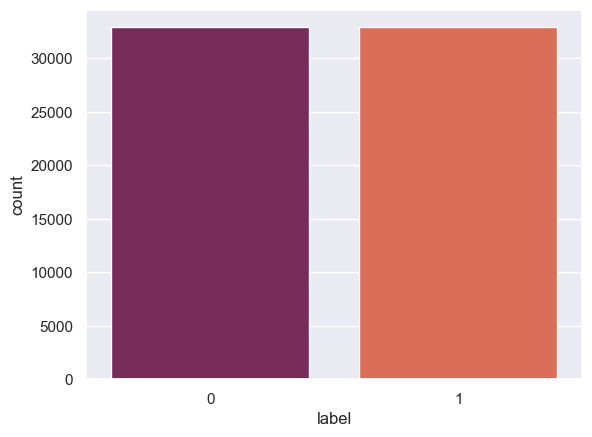

In [93]:
sns.countplot(data = y_ros , x="label" ,palette="rocket" )      # AFTER BALANCING DATA
plt.show()

# EXPLORATORY DATA ANALYSIS (EDA)

### 1. DISTRIBUTION PLOT

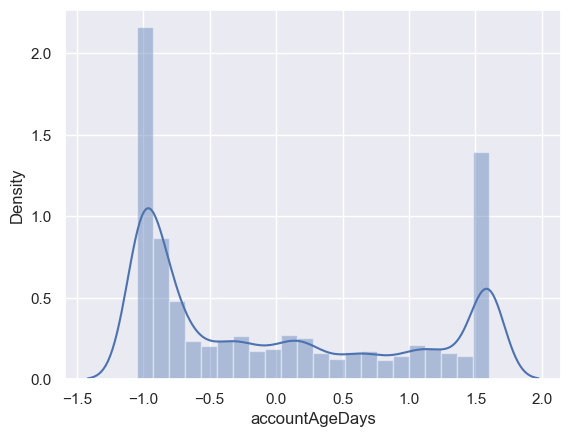

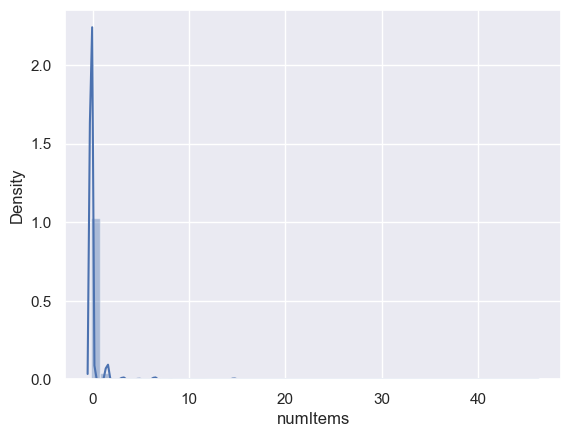

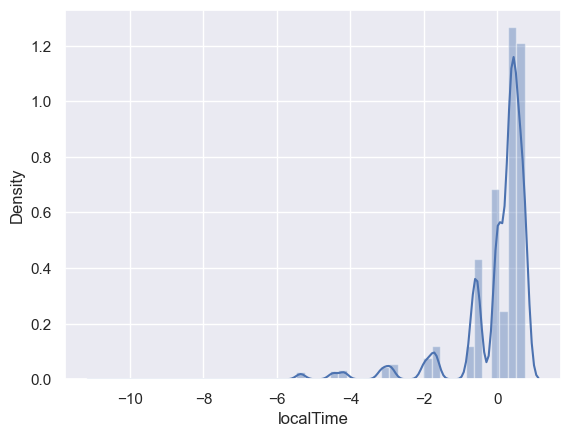

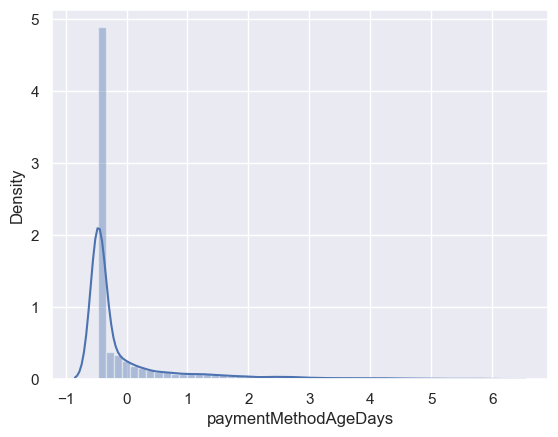

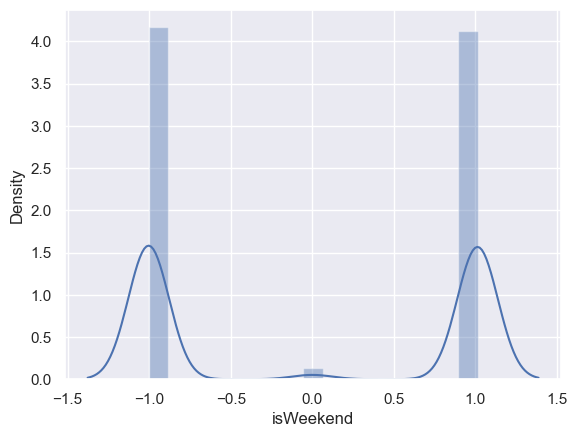

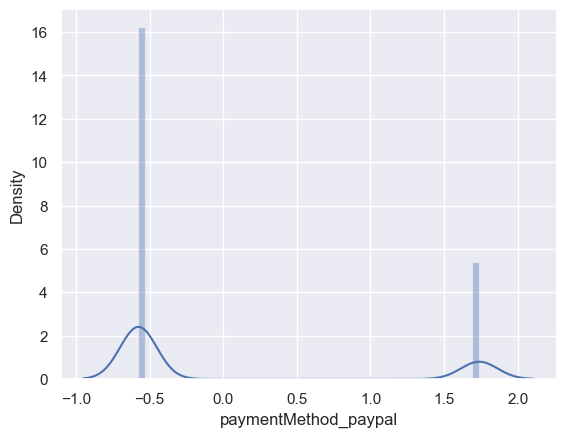

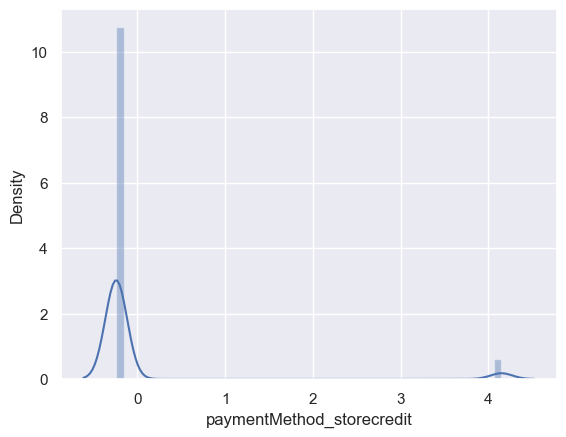

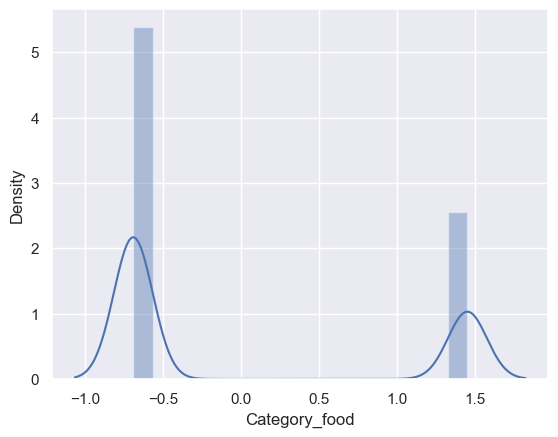

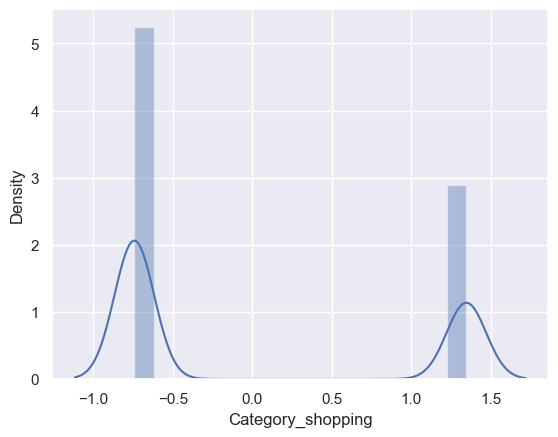

In [43]:
def distplots(col):
    sns.distplot(sc_x[col])
    plt.show()
for i in list(sc_x.columns)[0:]:
    distplots(i)

### 2. HEAT MAP - FOR FINDING CORRELATION

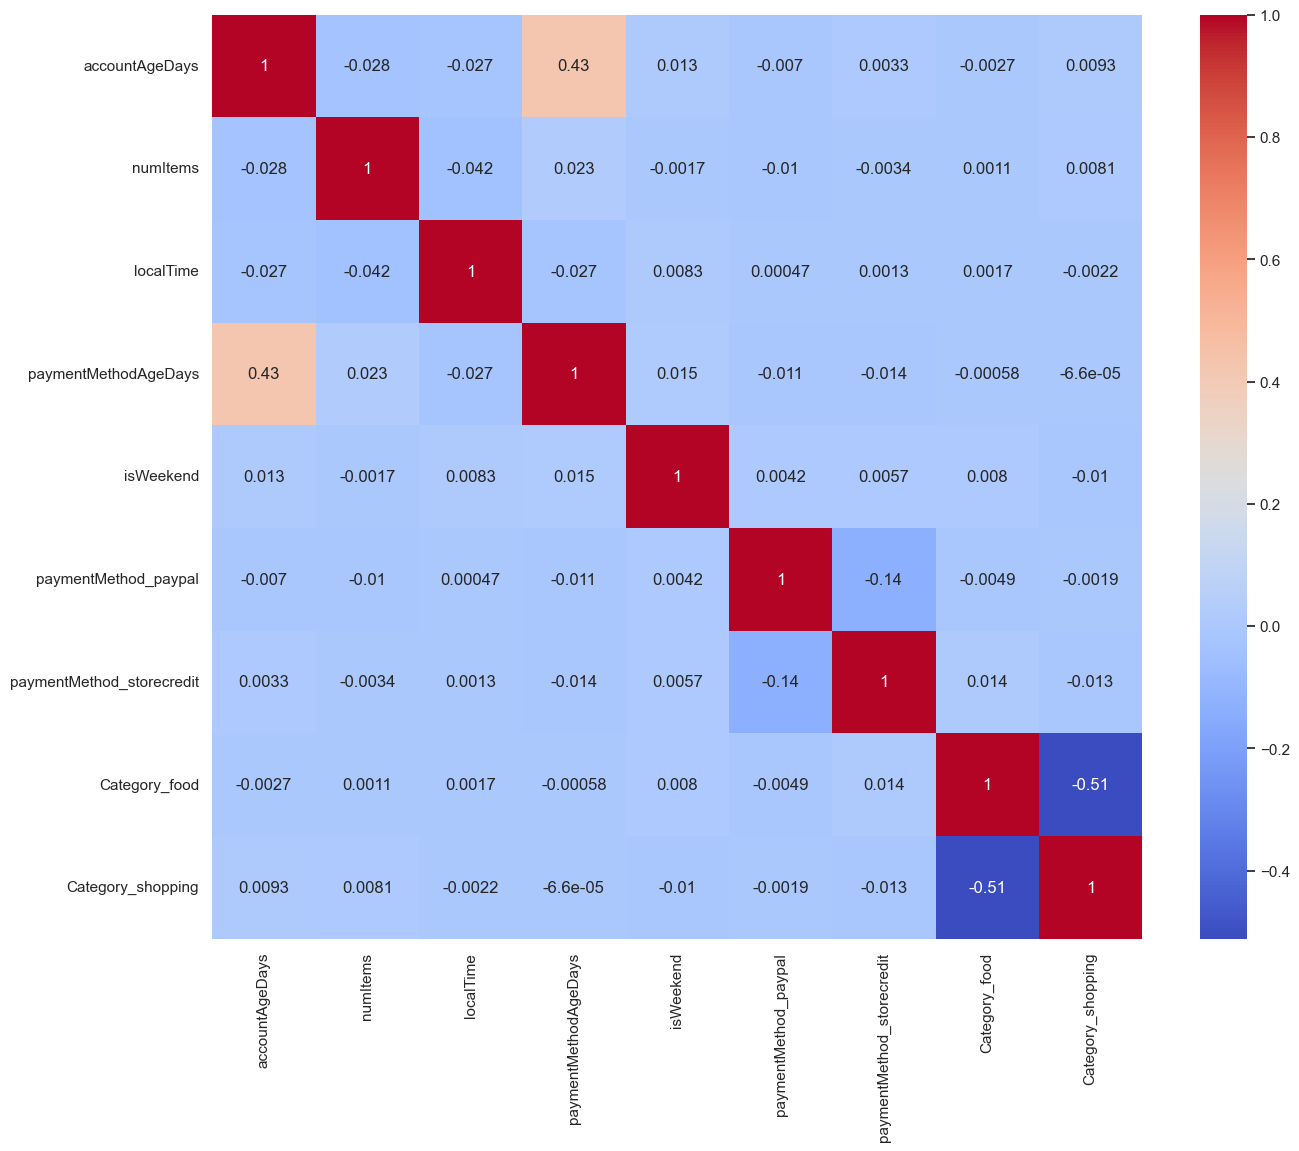

In [44]:
plt.figure(figsize=(15,12))
corr1 = sc_x.corr()
sns.heatmap(corr1 , annot=True , cmap= "coolwarm")
plt.show()

####   ---------THERE IS NO CORRELATION IN THE DATSET ----------

### 3. HISTOGRAM

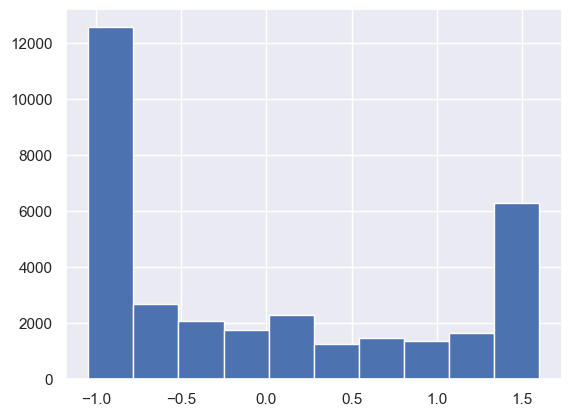

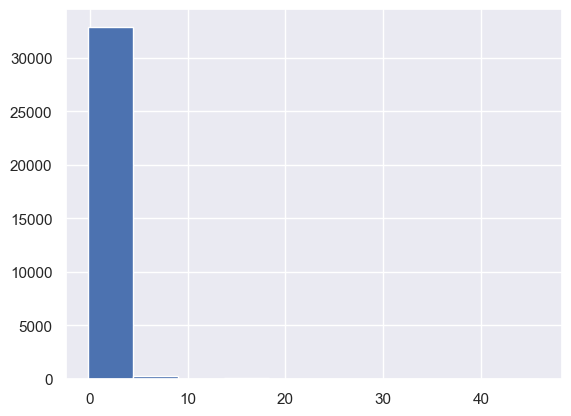

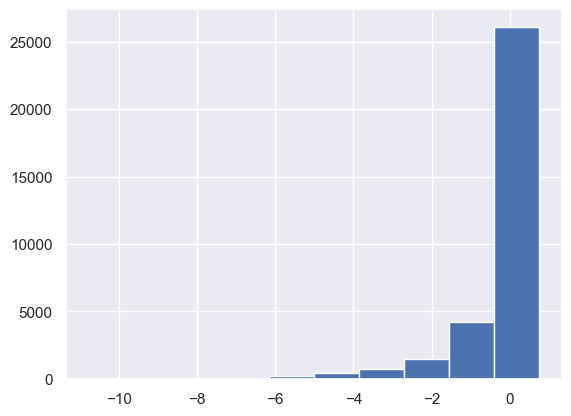

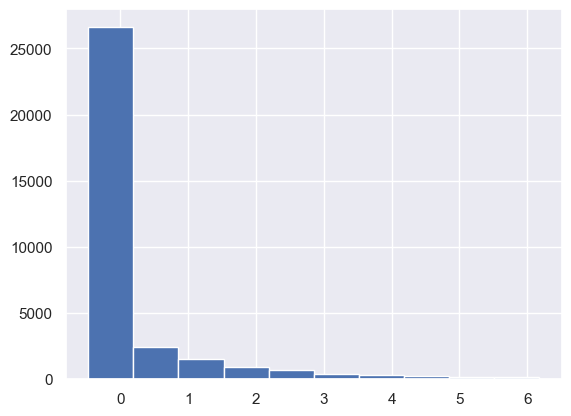

In [45]:
def histograms(col):
    plt.hist(sc_x[col])
    plt.show()
for i in list(sc_x.columns)[0:4]:
    histograms(i)

### 4. PAIR PLOT

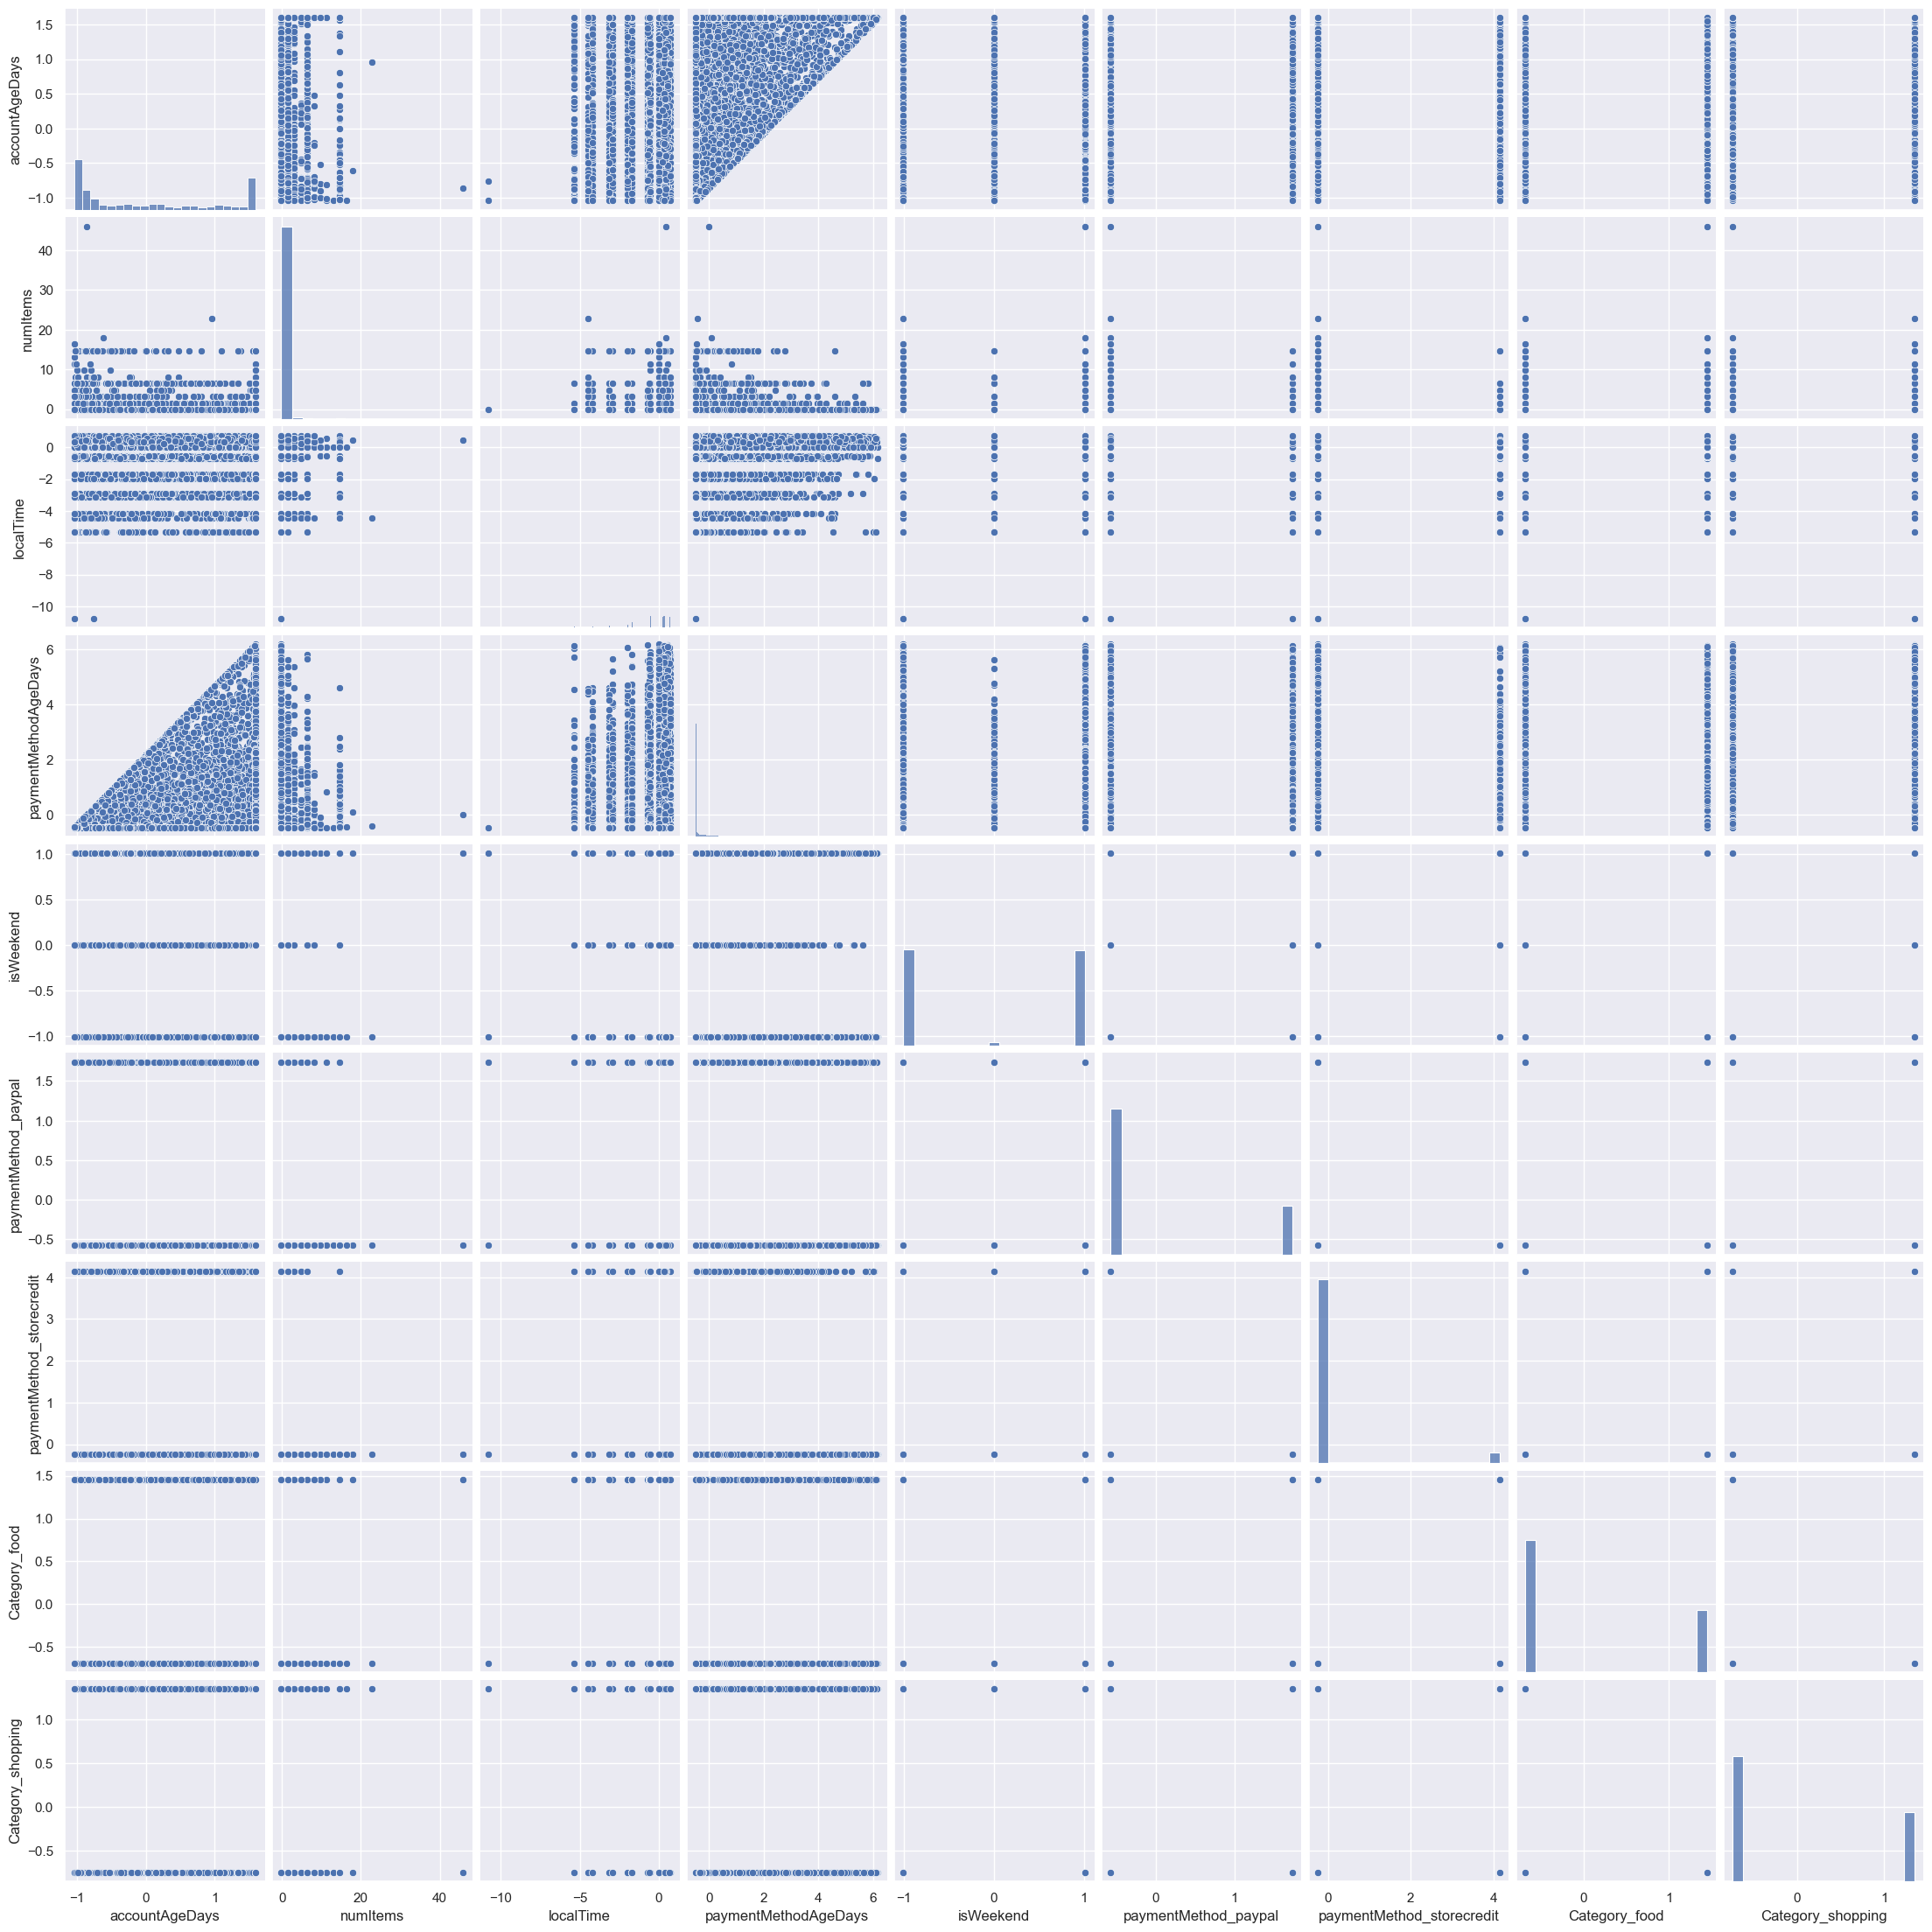

In [46]:
sns.pairplot(sc_x)

### 4. COUNTPLOT

#### WHICH PAYMENT METHOD HAS HIGHLY USED AND  FRAUDULENT HAPPENED?

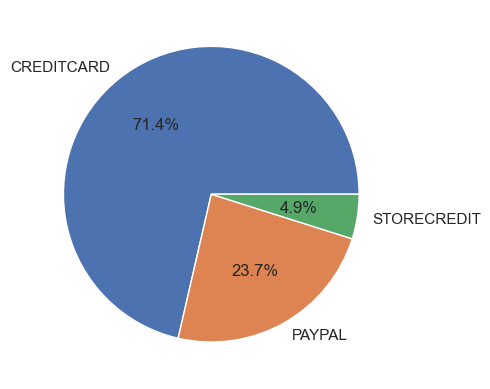

In [84]:
label = ['CREDITCARD','PAYPAL', 'STORECREDIT',]
data = df["paymentMethod"].value_counts()
plt.pie(data, labels=label , autopct = '%1.1f%%')
plt.show()

<AxesSubplot:xlabel='paymentMethod', ylabel='count'>

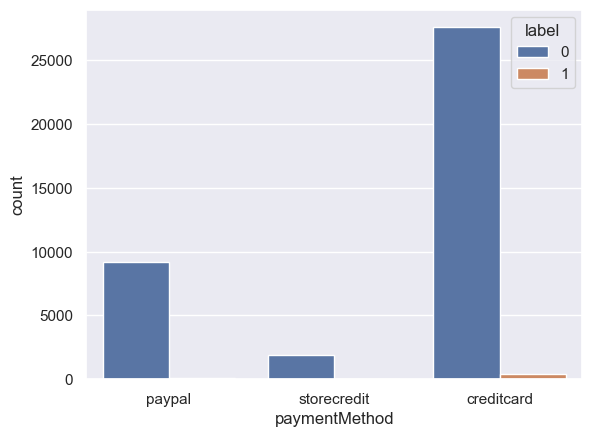

In [160]:
sns.countplot(data=df , x="paymentMethod" ,  hue="label" )

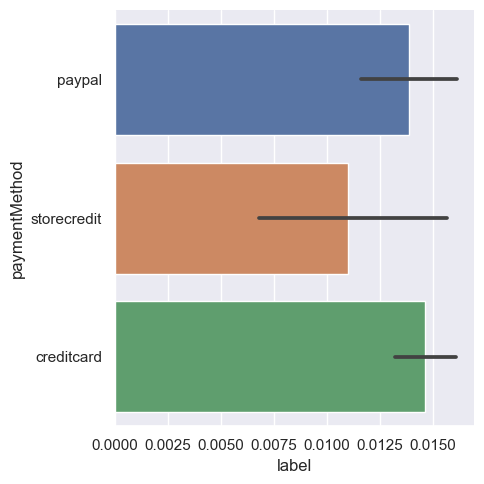

In [61]:
sns.catplot(data=df , x='label' , y='paymentMethod' ,kind = 'bar')

####  IS FRAUDELUNT HAPPENED IN WEEKEND?

<AxesSubplot:xlabel='isWeekend', ylabel='count'>

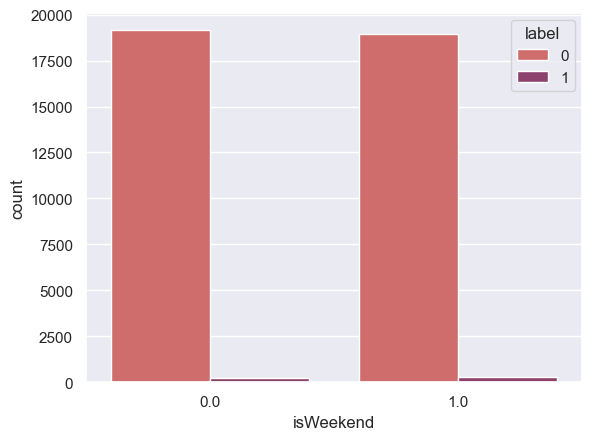

In [71]:
sns.countplot(data=df , x="isWeekend" ,  hue="label", palette="flare"  )

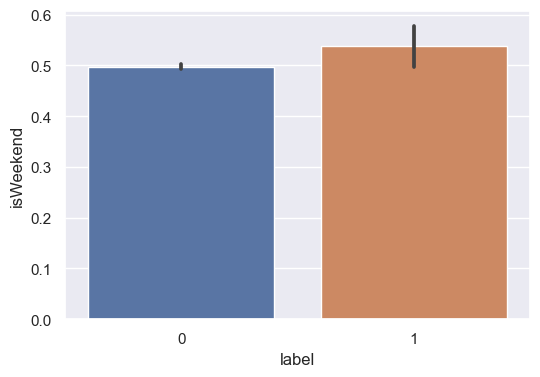

In [51]:
plt.figure(figsize=(6,4))
sns.barplot(x="label" , y = "isWeekend" , data=df)
plt.show()

#### IN WHICH CATEGORY HIGHLY USED AND FRAUDULENT HAPPENED?

In [85]:
df["Category"].value_counts()

shopping       13152
electronics    12748
food           12674
Name: Category, dtype: int64

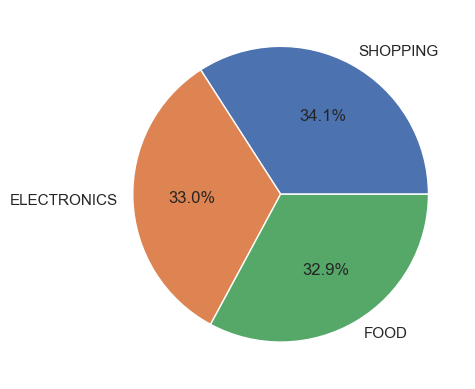

In [86]:
label = [ 'SHOPPING','ELECTRONICS','FOOD']
data = df["Category"].value_counts()
plt.pie(data, labels=label , autopct = '%1.1f%%')
plt.show()

<AxesSubplot:xlabel='Category', ylabel='count'>

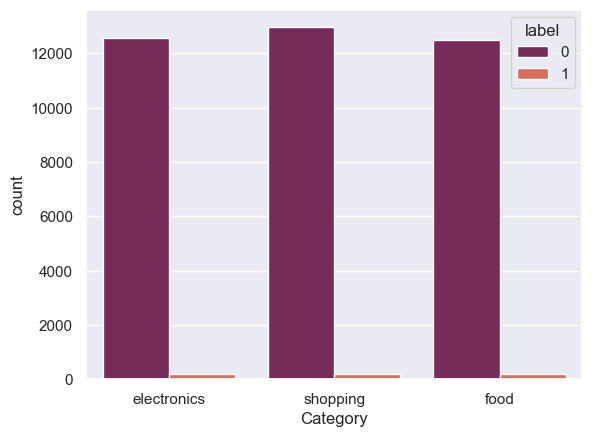

In [70]:
sns.countplot(data=df , x="Category" ,  hue="label" , palette="rocket" )

#### HOW MANY PERCENTAGE FRAUD HAPPENEND IN DATASET?

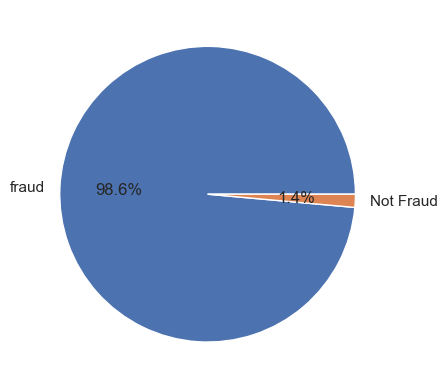

In [81]:
label = ['fraud' , 'Not Fraud']
data = df["label"].value_counts()
plt.pie(data, labels=label , autopct = '%1.1f%%')
plt.show()

# PRINCIPAL COMPONENT ANALYSIS(PCA) - DIMENSIONALITY REDUCTION

In [56]:
from sklearn.decomposition import PCA

In [57]:
pca = PCA(0.95)
x_pca = pca.fit_transform(x_ros)
print(sc_x.shape)
print()
print(x_pca.shape)

(33225, 9)

(65834, 8)


# SPLIT DATA INTO TRAINING  AND TEST

In [58]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pca, y_ros, test_size= 0.20, random_state=101)

# BUILDING  MODEL 

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import VotingClassifier

from sklearn.metrics import  accuracy_score , confusion_matrix , classification_report

In [60]:
# LogisticRegression

logistic = LogisticRegression()
lr = logistic.fit(x_train, y_train)
y_pred_lr = logistic.predict(x_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# DecisionTree

dtree = DecisionTreeClassifier()
dt = dtree.fit(x_train, y_train)
y_pred_dt = dtree.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# RandomForest

rfmodel = RandomForestClassifier()
rf = rfmodel.fit(x_train, y_train)
y_pred_rf = rfmodel.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# BaggingClassifier

bagg = BaggingClassifier()
bg = bagg.fit(x_train, y_train)
y_pred_bg = bagg.predict(x_test)
accuracy_bg = accuracy_score(y_test, y_pred_bg)

# GradientBoostingClassifier

gdb = GradientBoostingClassifier()
gd = gdb.fit(x_train, y_train)
y_pred_gd = gdb.predict(x_test)
accuracy_gd = accuracy_score(y_test, y_pred_gd)

# XGBClassifier

xgb = XGBClassifier()
xg = xgb.fit(x_train, y_train)
y_pred_xg = xgb.predict(x_test)
accuracy_xg = accuracy_score(y_test, y_pred_xg)
                          
# KNN

knn = KNeighborsClassifier()
kn = knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

In [61]:
from sklearn.ensemble import VotingClassifier

In [62]:
evc = VotingClassifier(estimators=[('lr',lr),('dt',dt),('rf', rf),('bg', bg),
                                  ('gd', gd),('xg', xg),('kn', kn)],voting='hard')

model_evc = evc.fit(x_train, y_train)
pred_evc = evc.predict(x_test)
accuracy_evc = accuracy_score(y_test, pred_evc)

          Method Used  Accuracy
0  LogisticRegression  0.937875
1        DecisionTree  0.996886
2        RandomForest  0.997266
3             Bagging  0.997038
4    GradientBoosting  0.919192
5             XGBoost  0.988760
6   KNearestNeighbors  0.991038
7    VotingClassifier  0.994912
AxesSubplot(0.125,0.11;0.775x0.77)


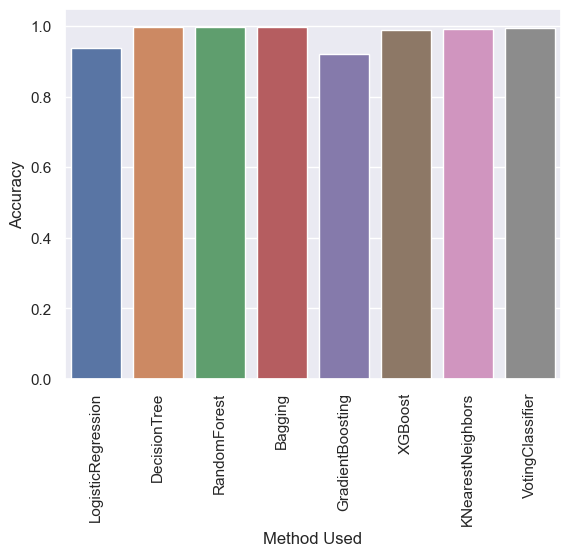

In [63]:
list1 = ['LogisticRegression','DecisionTree','RandomForest','Bagging',
         'GradientBoosting', 'XGBoost', 'KNearestNeighbors',
          'VotingClassifier']

list2 = [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_bg,accuracy_gd, 
         accuracy_xg,accuracy_knn , accuracy_evc]

list3 = [logistic, dtree, rfmodel, bagg, gdb, xgb,knn ,evc ]

final_accuracy = pd.DataFrame({'Method Used': list1, "Accuracy": list2})
print(final_accuracy)

charts = sns.barplot(x="Method Used", y = 'Accuracy', data=final_accuracy)
charts.set_xticklabels(charts.get_xticklabels(), rotation=90)
print(charts)

###### ---------------HIGHEST ACCURACY : RANDOM FOREST MODEL - 99.7%  AND BAGGING CLASSIFIER - 99.7%  Trying both the models individually and predict which model performing well--------

# 
# BAGGING CLASSIFIER MODEL

In [64]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier()
bagging.fit(x_train, y_train)

BaggingClassifier()

In [65]:
y_pred_train_bgg = bagging.predict(x_train)
y_pred_test_bgg = bagging.predict(x_test)

In [66]:
print("TRAIN ACCURACY :" , accuracy_score(y_train, y_pred_train_bgg))
print("TEST ACCURACY :" , accuracy_score(y_test, y_pred_test_bgg))

TRAIN ACCURACY : 0.9998101277840014
TEST ACCURACY : 0.9971139971139971


#### VALIDATE MODEL - CROSS VALIDATION

In [67]:
from sklearn.model_selection import cross_val_score

In [68]:
print("TRAIN ACCURACY:" ,np.mean(cross_val_score(bagging , x_train , y_train , cv=12)))
print("TEST ACCURACY:" , np.mean(cross_val_score(bagging , x_test , y_test , cv=12)))

TRAIN ACCURACY: 0.9967342209491853
TEST ACCURACY: 0.9882289226177924


##### ----------- BAGGING CLASSIFIER MODEL :  TRAIN ACCURACY = 99.6 %       &      TEST ACCURACY  = 98.8 % -----------------
# 

# RANDOM FOREST CLASSIFIER MODEL

In [89]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [90]:
y_pred_train_rf = rfc.predict(x_train)
y_pred_test_rf = rfc.predict(x_test)

In [91]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

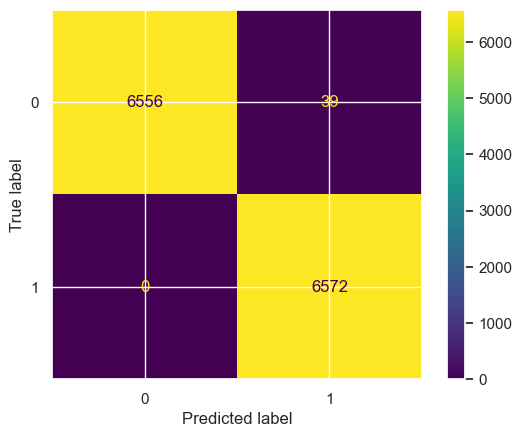

In [94]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rfc, x_test, y_test)
plt.show()

#### ------ FALSE NEAGTIVE IS MORE DANGEROUS HERE.(ACTUAL - FRAUD , PRED - NO FRAUD) FN IS 0 -------------

In [92]:
confusion_matrix(y_test, y_pred_test_rf)

array([[6556,   39],
       [   0, 6572]], dtype=int64)

In [93]:
print(classification_report(y_test, y_pred_test_rf))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      6595
           1       0.99      1.00      1.00      6572

    accuracy                           1.00     13167
   macro avg       1.00      1.00      1.00     13167
weighted avg       1.00      1.00      1.00     13167



##### ----- ROC_AUC_CURVE

In [98]:
from sklearn.metrics import roc_auc_score
rf_roc_auc = roc_auc_score(y_test, y_pred_test_rf)
rf_roc_auc

0.9970432145564823

In [118]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_rf)
display(fpr)
display(tpr)
display(thresholds)

array([0.        , 0.00591357, 1.        ])

array([0., 1., 1.])

array([2, 1, 0], dtype=int64)

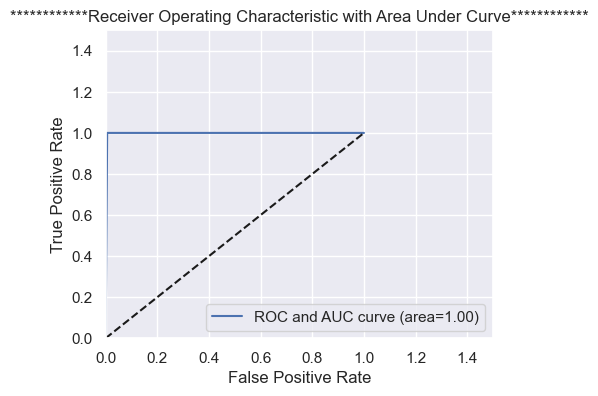

In [121]:
plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label= "ROC and AUC curve (area=%0.2f)" % rf_roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0,1.5])
plt.ylim([0.0,1.5])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("************Receiver Operating Characteristic with Area Under Curve************")
plt.legend(loc='lower right')
plt.show()

In [71]:
print("TRAIN ACCURACY RF:" , accuracy_score(y_train , y_pred_train_rf))
print("TEST  ACCURACY RF:" , accuracy_score(y_test , y_pred_test_rf))

TRAIN ACCURACY RF: 1.0
TEST  ACCURACY RF: 0.9972658920027341


#### VALIDATE MODEL - CROSS VALIDATION

In [72]:
from sklearn.model_selection import cross_val_score

In [73]:
print("TRAIN ACCURACY:" ,np.mean(cross_val_score(rfc , x_train , y_train , cv=10)))
print("TEST ACCURACY:" , np.mean(cross_val_score(rfc , x_test , y_test , cv=10)))

TRAIN ACCURACY: 0.9969050752844082
TEST ACCURACY: 0.9870132912371077


##### HYPER-PARAMETER TUNING - RANDOMIZED SEARCH CV

In [74]:
rfc = RandomForestClassifier()

In [75]:
n_estimators= [20,60,80,90,100,200]
max_depth=[6,8,7,10,11,12]
max_features=['auto',"sqrt", "log2"] 
bootstrap=[True, False]
min_samples_split=[2,3,4,5,6,8]
min_samples_leaf=[2,3,4,5]

In [76]:
param_distributions = {'n_estimators':n_estimators,"max_depth":max_depth,
             "max_features":max_features, "bootstrap":bootstrap,
              'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf}

print(param_distributions)

{'n_estimators': [20, 60, 80, 90, 100, 200], 'max_depth': [6, 8, 7, 10, 11, 12], 'max_features': ['auto', 'sqrt', 'log2'], 'bootstrap': [True, False], 'min_samples_split': [2, 3, 4, 5, 6, 8], 'min_samples_leaf': [2, 3, 4, 5]}


In [78]:
from sklearn.model_selection import RandomizedSearchCV

rf_ran = RandomizedSearchCV(estimator= rfc, param_distributions=param_distributions, cv=10)
                      

In [79]:
rf_ran.fit(x_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [6, 8, 7, 10, 11, 12],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5, 6, 8],
                                        'n_estimators': [20, 60, 80, 90, 100,
                                                         200]})

In [80]:
rf_ran.best_params_

{'n_estimators': 200,
 'min_samples_split': 8,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 12,
 'bootstrap': False}

In [81]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 200 , min_samples_split= 8 ,min_samples_leaf=5,
                            max_features ='auto', max_depth = 12 , bootstrap =True)
rf.fit(x_train, y_train)
y_pred_train_rf1 = rf.predict(x_train)
y_pred_test_rf1 = rf.predict(x_test)


In [82]:
print("TRAIN ACCURACY RF :" , accuracy_score(y_train , y_pred_train_rf1).round(3))
print("TEST ACCURACY RF :" , accuracy_score(y_test , y_pred_test_rf1).round(3))

TRAIN ACCURACY RF : 0.981
TEST ACCURACY RF : 0.978


##### ----------- RANDOM FOREST CLASSIFIER MODEL :  TRAIN ACCURACY = 98.1%       &      TEST ACCURACY  = 97.8 % -----------------


###### -------- RANDOM FOREST CLASSIFIER MODEL is the Best model with Good Train and Test Accuracies for PAYMENT FRAUDULENT PREDICTION----

# 
## CONCLUSION : 
### RANDOM FOREST CLASSIFIER :
###       TRAIN ACCURACY = 98.1 %
###       TEST  ACCURACY = 97.8 %

In [53]:
input = [1,2,3,4,5,6,7,8]
output = [(1,2),(3,4),(5,6),(7,8)]

In [36]:
l1[0:1]

[1]

In [ ]:
    for i in l1

In [57]:
l2=[]
for i in range(0,8):
    l2.append(l1[i])
    print(l2)

[1]
[1, 2]
[1, 2, 3]
[1, 2, 3, 4]
[1, 2, 3, 4, 5]
[1, 2, 3, 4, 5, 6]
[1, 2, 3, 4, 5, 6, 7]
[1, 2, 3, 4, 5, 6, 7, 8]


In [17]:
a = "this"

In [28]:
for i in reversed(a):
    print(i,end="")

siht